# **Práctica BBDD genómicas**
* Andrea Mayor Gómez
* Laura Lasso García

## **Librerías**

In [1]:
import requests
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#%pip install panel
import pandas as pd
import panel as pn
from collections import Counter

## **Obtención de las secuencias de ADN y de aminoácidos mediante la API de NCBI**

In [2]:
# Función para obtener una secuencia en NCBI por ID en formato específico
def fetch_sequence(sequence_id, rettype="fasta", db="nucleotide"):
    url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db={db}&id={sequence_id}&rettype={rettype}&retmode=text"
    response = requests.get(url)
    return response.text if response.status_code == 200 else None

# Función para guardar un archivo
def save_to_file(data, default_ext, file_types, title):
    save_path = filedialog.asksaveasfilename(
        defaultextension=default_ext,
        filetypes=file_types,
        title=title
    )
    if save_path:
        try:
            with open(save_path, "w") as file:
                file.write(data)
            messagebox.showinfo("Éxito", f"Archivo guardado en {save_path}.")
        except Exception as e:
            messagebox.showerror("Error", f"No se pudo guardar el archivo: {str(e)}")

# Función para procesar entrada de genes
def process_gene_input():
    input_value = entry_gene.get().strip()
    if not input_value:
        messagebox.showerror("Error", "Introduce un ID o nombre de gen.")
        return

    # Obtener secuencia en formato FASTA
    fasta_data = fetch_sequence(input_value, rettype="fasta", db="nucleotide")
    if fasta_data:
        save_to_file(
            fasta_data,
            default_ext=".fasta",
            file_types=[("FASTA files", "*.fasta"), ("All files", "*.*")],
            title="Guardar archivo FASTA (Gen)"
        )
    else:
        messagebox.showerror("Error", "No se pudo obtener la secuencia en formato FASTA.")

    # Obtener secuencia en formato GenBank
    genbank_data = fetch_sequence(input_value, rettype="gb", db="nucleotide")
    if genbank_data:
        save_to_file(
            genbank_data,
            default_ext=".gb",
            file_types=[("GenBank files", "*.gb"), ("All files", "*.*")],
            title="Guardar archivo GenBank (Gen)"
        )
    else:
        messagebox.showerror("Error", "No se pudo obtener la secuencia en formato GenBank.")

# Función para procesar entrada de proteínas
def process_protein_input():
    input_value = entry_protein.get().strip()
    if not input_value:
        messagebox.showerror("Error", "Introduce un ID o nombre de proteína.")
        return

    # Obtener secuencia en formato FASTA
    fasta_data = fetch_sequence(input_value, rettype="fasta", db="protein")
    if fasta_data:
        save_to_file(
            fasta_data,
            default_ext=".fasta",
            file_types=[("FASTA files", "*.fasta"), ("All files", "*.*")],
            title="Guardar archivo FASTA (Proteína)"
        )
    else:
        messagebox.showerror("Error", "No se pudo obtener la secuencia en formato FASTA.")

    # Obtener archivo equivalente a GenBank para proteínas
    genbank_protein_data = fetch_sequence(input_value, rettype="gb", db="protein")
    if genbank_protein_data:
        save_to_file(
            genbank_protein_data,
            default_ext=".gb",
            file_types=[("GenBank files", "*.gb"), ("All files", "*.*")],
            title="Guardar archivo GenBank (Proteína)"
        )
    else:
        messagebox.showerror("Error", "No se pudo obtener el archivo GenBank para la proteína.")

# Interfaz gráfica de usuario
root = tk.Tk()
root.title("Búsqueda de Secuencias")
root.geometry("400x300")

# Estilo de la interfaz
style = ttk.Style(root)
style.configure("TButton", background="lightblue", font=("Helvetica", 10, "bold"))
style.configure("TLabel", font=("Helvetica", 10))
style.configure("TEntry", padding=5)
style.map("TButton", background=[("active", "#ffcccb")])

# Sección para búsqueda de genes
search_frame_gene = ttk.LabelFrame(root, text="Buscar Secuencia de ADN")
search_frame_gene.pack(fill="both", expand="yes", padx=10, pady=10)

label_gene = ttk.Label(search_frame_gene, text="Introduce un ID de gen:")
label_gene.pack(pady=5)

entry_gene = ttk.Entry(search_frame_gene, width=30)
entry_gene.pack(pady=5)

button_search_gene = ttk.Button(search_frame_gene, text="Buscar Secuencia de Gen", command=process_gene_input)
button_search_gene.pack(pady=5)

# Sección para búsqueda de proteínas
search_frame_protein = ttk.LabelFrame(root, text="Buscar Secuencia de Proteína")
search_frame_protein.pack(fill="both", expand="yes", padx=10, pady=10)

label_protein = ttk.Label(search_frame_protein, text="Introduce un ID de proteína:")
label_protein.pack(pady=5)

entry_protein = ttk.Entry(search_frame_protein, width=30)
entry_protein.pack(pady=5)

button_search_protein = ttk.Button(search_frame_protein, text="Buscar Secuencia de Proteína", command=process_protein_input)
button_search_protein.pack(pady=5)

# Ejecutar la interfaz gráfica
root.mainloop()

## **Longitud y conteo de bases para todas secuencias de ADN**

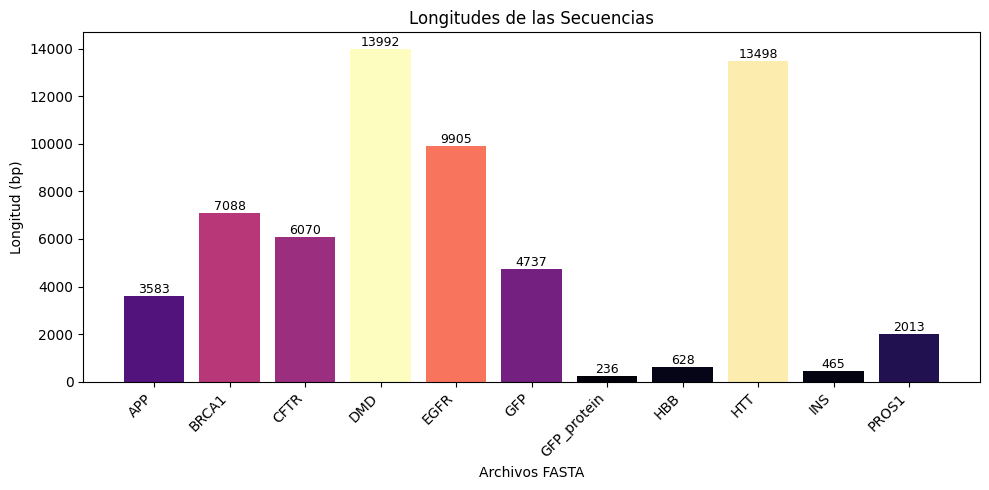

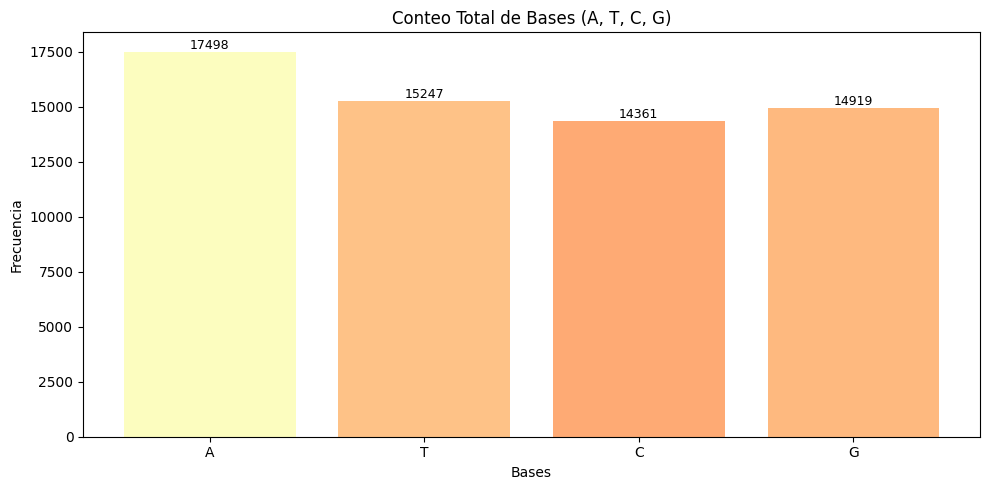

In [3]:
folder_path = 'datos'

file_lengths = []
file_names = []
base_counts = {"A": 0, "T": 0, "C": 0, "G": 0}

# Procesar cada archivo FASTA en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith(".fasta"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            seq_record = SeqIO.read(file, "fasta")
            sequence = str(seq_record.seq)
            
            # Longitud de la secuencia
            length = len(sequence)
            file_lengths.append(length)
            file_names.append(os.path.splitext(filename)[0])
            
            # Conteo de bases
            base_counts["A"] += sequence.count("A")
            base_counts["T"] += sequence.count("T")
            base_counts["C"] += sequence.count("C")
            base_counts["G"] += sequence.count("G")

# Graficar las longitudes de las secuencias
plt.figure(figsize=(10, 5))
colors = cm.magma([i / max(file_lengths) for i in file_lengths])
bars = plt.bar(range(len(file_lengths)), file_lengths, tick_label=file_names, color=colors)
plt.title("Longitudes de las Secuencias")
plt.xlabel("Archivos FASTA")
plt.ylabel("Longitud (bp)")
plt.xticks(rotation=45, ha="right")

# Mostrar valores exactos sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Graficar el conteo de bases
plt.figure(figsize=(10, 5))
colors = cm.magma([count / max(base_counts.values()) for count in base_counts.values()]) 
bars = plt.bar(base_counts.keys(), base_counts.values(), color=colors)
plt.title("Conteo Total de Bases (A, T, C, G)")
plt.xlabel("Bases")
plt.ylabel("Frecuencia")

# Mostrar valores exactos sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## **Conteo de bases para cada secuencia de ADN**

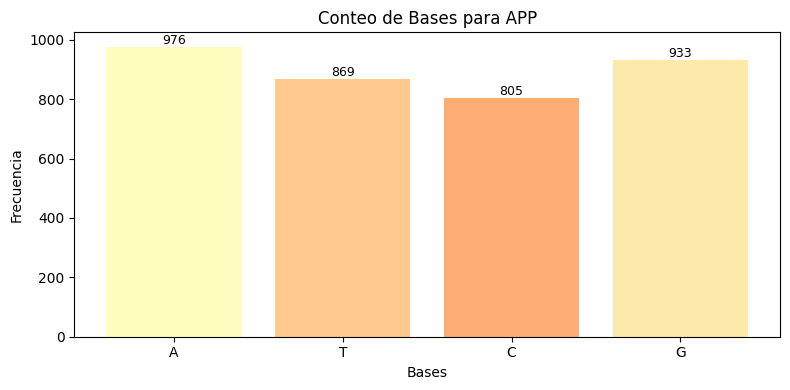

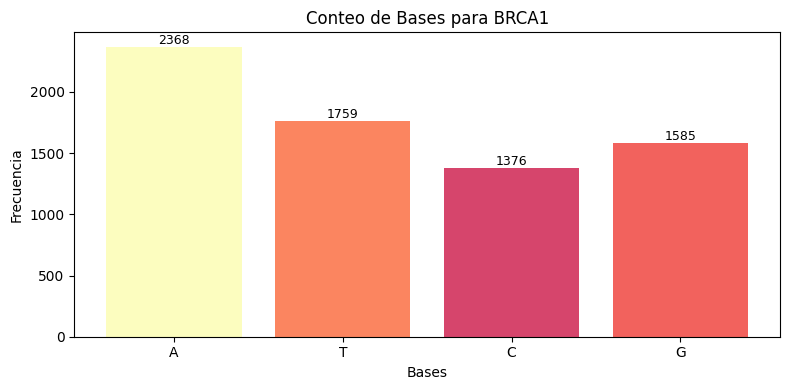

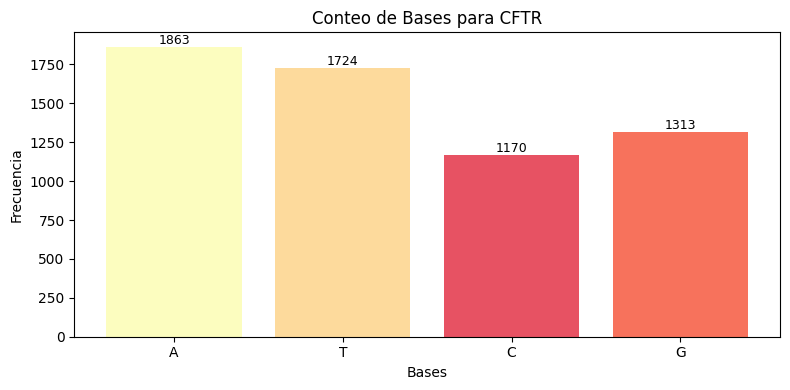

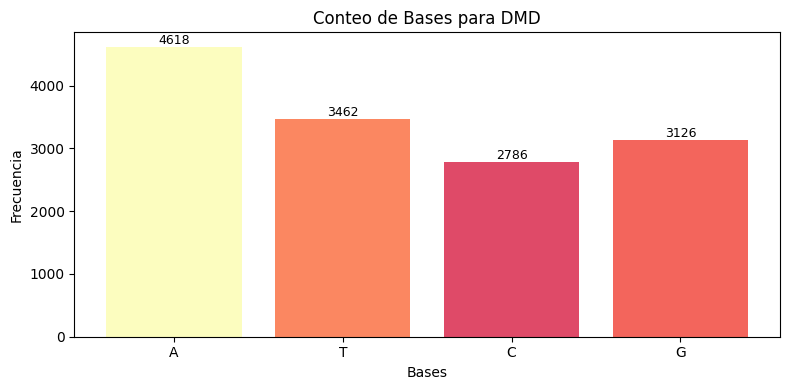

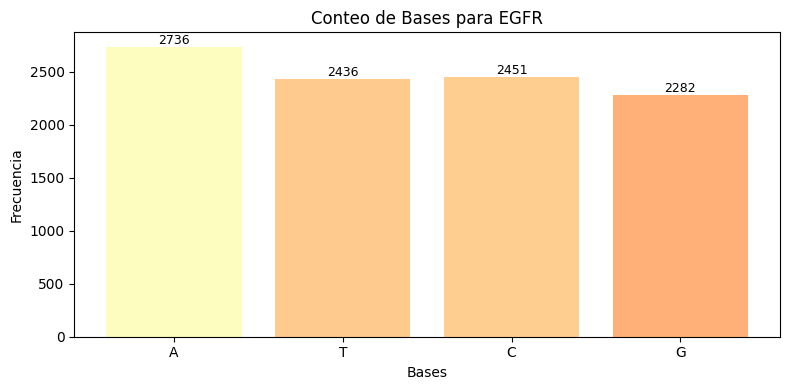

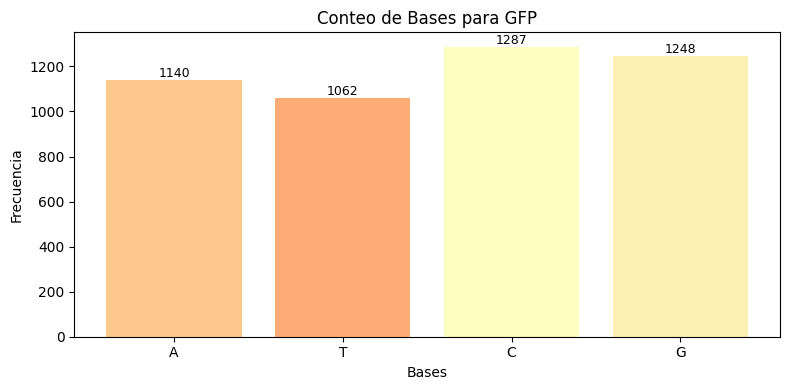

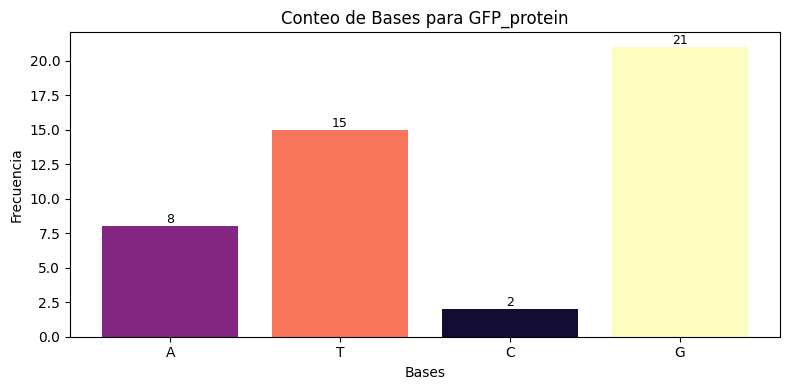

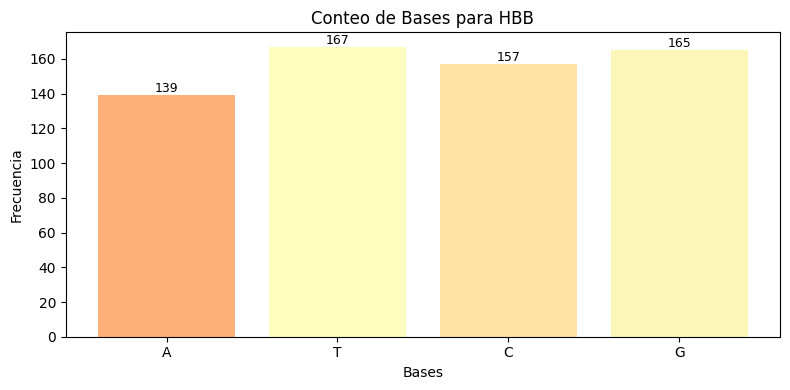

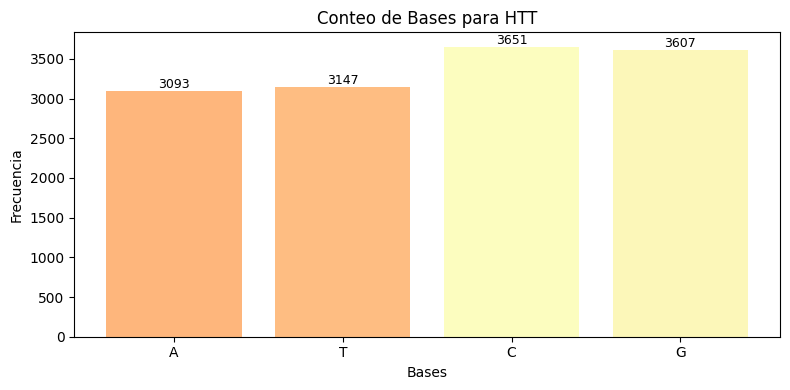

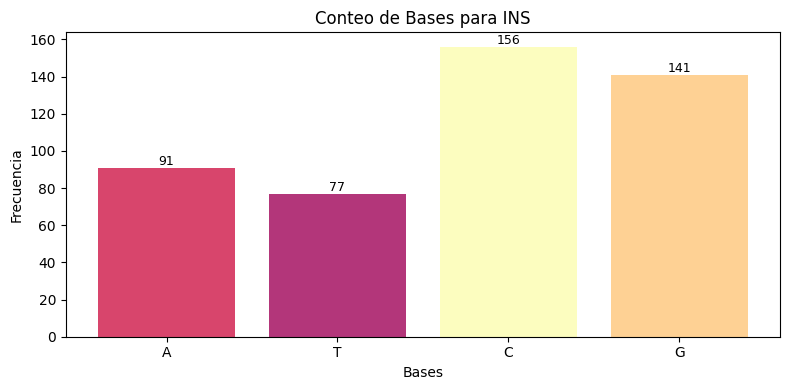

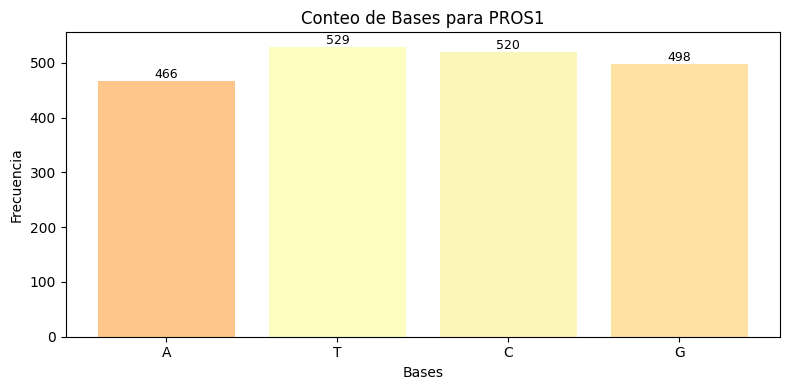

In [4]:
folder_path = 'datos'

for filename in os.listdir(folder_path):
    if filename.endswith(".fasta"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            seq_record = SeqIO.read(file, "fasta")
            sequence = str(seq_record.seq)
            
            counts = {
                "A": sequence.count("A"),
                "T": sequence.count("T"),
                "C": sequence.count("C"),
                "G": sequence.count("G"),
            }
            
            colors = cm.magma([count / max(counts.values()) for count in counts.values()])
            
            plt.figure(figsize=(8, 4))
            bars = plt.bar(counts.keys(), counts.values(), color=colors)
            plt.title(f"Conteo de Bases para {os.path.splitext(filename)[0]}")
            plt.xlabel("Bases")
            plt.ylabel("Frecuencia")
            
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=9)
            
            plt.tight_layout()
            plt.show()


## **APP**
### **Análisis archivo GenBank**

In [5]:
genbank_file = f"./datos/APP.gb"

def extract_genbank_info(genbank_file):
    records = SeqIO.parse(genbank_file, "genbank")
    
    for record in records:
        # Información general
        print(f"ID: {record.id}")
        print(f"Name: {record.name}")
        print(f"Description: {record.description}")
        print(f"Length: {len(record.seq)} bp")
        print(f"Accession: {record.annotations.get('accessions', 'N/A')}")
        print(f"Organism: {record.annotations.get('organism', 'N/A')}")
        print(f"Taxonomy: {'; '.join(record.annotations.get('taxonomy', []))}")
        
        # Extraer características (features)
        print("\nFeatures:")
        for feature in record.features:
            print(f"- Type: {feature.type}")
            if 'gene' in feature.qualifiers:
                print(f"  Gene: {feature.qualifiers['gene'][0]}")
            if 'product' in feature.qualifiers:
                print(f"  Product: {feature.qualifiers['product'][0]}")
            if 'note' in feature.qualifiers:
                print(f"  Note: {feature.qualifiers['note'][0]}")
            if feature.type == "exon":
                print(f"  Exon location: {feature.location}")
            if feature.type == "CDS":
                print(f"  CDS location: {feature.location}")
            print(f"  Location: {feature.location}")
    
        print("\nSequence (first 100 bases):")
        print(record.seq[:100])  # Mostrar los primeros 100 nucleótidos
        print("\n")

extract_genbank_info(genbank_file)

ID: NM_000484.4
Name: NM_000484
Description: Homo sapiens amyloid beta precursor protein (APP), transcript variant 1, mRNA
Length: 3583 bp
Accession: ['NM_000484']
Organism: Homo sapiens
Taxonomy: Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi; Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini; Catarrhini; Hominidae; Homo

Features:
- Type: source
  Location: [0:3583](+)
- Type: gene
  Gene: APP
  Note: amyloid beta precursor protein
  Location: [0:3583](+)
- Type: exon
  Gene: APP
  Exon location: [0:207](+)
  Location: [0:207](+)
- Type: CDS
  Gene: APP
  Product: amyloid-beta precursor protein isoform a precursor
  Note: isoform a precursor is encoded by transcript variant 1; peptidase nexin-II; cerebral vascular amyloid peptide; protease nexin-II; amyloid beta A4 protein; beta-amyloid peptide; alzheimer disease amyloid protein; beta-amyloid peptide(1-40); beta-amyloid peptide(1-42); amyloid precursor protein; beta-amyloid precursor protein; testicular ti

### **Creación de tablas con la información contenida en GenBank de APP**

In [6]:
genbank_file = f"./datos/APP.gb"

def extract_genbank_info_to_tables(genbank_file):
    records = SeqIO.parse(genbank_file, "genbank")
    general_info = []
    features_data = {}

    for record in records:
        # Información general
        general_info.append({
            "ID": record.id,
            "Name": record.name,
            "Description": record.description,
            "Length": f"{len(record.seq)} bp",
            "Accession": record.annotations.get("accessions", ["N/A"])[0],
            "Organism": record.annotations.get("organism", "N/A"),
            "Taxonomy": "; ".join(record.annotations.get("taxonomy", []))
        })
        
        # Extraer características (features)
        for feature in record.features:
            feature_type = feature.type
            if feature_type not in features_data:
                features_data[feature_type] = []

            feature_entry = {"Location": str(feature.location)}
            if "gene" in feature.qualifiers:
                feature_entry["Gene"] = feature.qualifiers["gene"][0]
            if "product" in feature.qualifiers:
                feature_entry["Product"] = feature.qualifiers["product"][0]
            if "note" in feature.qualifiers:
                feature_entry["Note"] = feature.qualifiers["note"][0]
            
            features_data[feature_type].append(feature_entry)
    
    # Convertir datos en DataFrames
    general_df = pd.DataFrame(general_info)
    feature_dfs = {ftype: pd.DataFrame(data) for ftype, data in features_data.items()}
    
    return general_df, feature_dfs

# Extraer la información
general_df, feature_dfs = extract_genbank_info_to_tables(genbank_file)

# Crear la aplicación interactiva
def create_app(general_df, feature_dfs):
    feature_selector = pn.widgets.Select(name="Feature Type", options=["General Info"] + list(feature_dfs.keys()))
    
    table = pn.widgets.Tabulator(general_df, pagination="remote", page_size=10)

    def update_table(event):
        selected_type = feature_selector.value
        if selected_type == "General Info":
            table.value = general_df
        else:
            table.value = feature_dfs[selected_type]
    
    feature_selector.param.watch(update_table, "value")
    
    app = pn.Column(
        pn.pane.Markdown("# GenBank Feature Explorer"),
        pn.Row(feature_selector),
        table
    )
    
    return app

# Crear la aplicación
app = create_app(general_df, feature_dfs)

# Servir la aplicación
pn.serve(app)

Launching server at http://localhost:64128


## **GFP**

### **Longitud y proporción de aminoácidos**

In [7]:
def leer_fasta(archivo_fasta):
    with open(archivo_fasta, 'r') as f:
        lines = f.readlines()
    
    secuencia = "".join(line.strip() for line in lines if not line.startswith(">"))
    return secuencia

def calcular_proporcion_aminoacidos(secuencia):
    total = len(secuencia)
    conteo = Counter(secuencia)
    
    proporciones = {aa: (cantidad / total) * 100 for aa, cantidad in conteo.items()}
    
    return proporciones

ruta_fasta = f'./datos/GFP_protein.fasta'  

secuencia_proteina = leer_fasta(ruta_fasta)

proporciones = calcular_proporcion_aminoacidos(secuencia_proteina)

print(f"Longitud de la secuencia: {len(secuencia_proteina)} aminoácidos\n")
print("Proporción de aminoácidos:")
for aa, porcentaje in sorted(proporciones.items()):
    print(f"{aa}: {porcentaje:.2f}%")


Longitud de la secuencia: 236 aminoácidos

Proporción de aminoácidos:
A: 3.39%
C: 0.85%
D: 7.63%
E: 6.78%
F: 5.51%
G: 8.90%
H: 4.24%
I: 5.08%
K: 8.47%
L: 8.05%
N: 5.51%
P: 4.24%
Q: 2.97%
R: 2.97%
S: 4.24%
T: 6.36%
V: 7.20%
W: 0.42%
X: 2.97%
Y: 4.24%


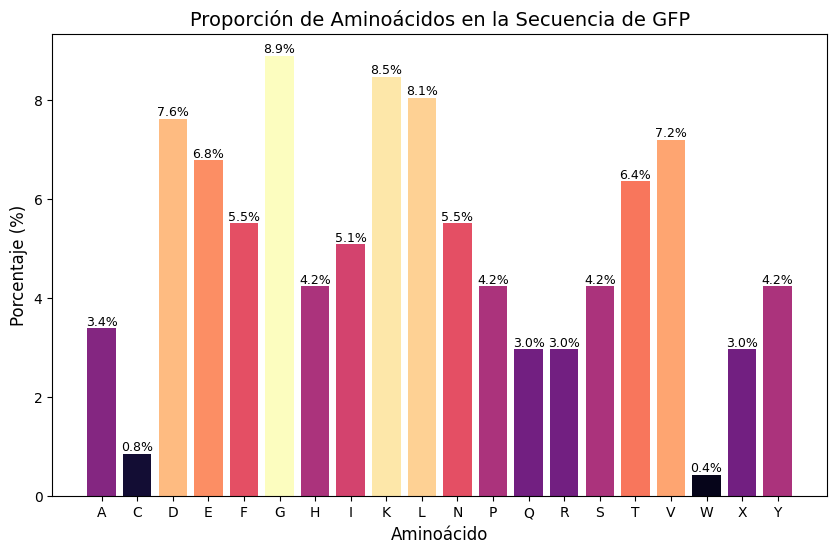

In [8]:
def graficar_proporcion_aminoacidos(proporciones):
    df = pd.DataFrame.from_dict(proporciones, orient='index', columns=['Porcentaje'])
    df.sort_index(inplace=True)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(df.index, df['Porcentaje'], color=plt.cm.magma(df['Porcentaje'] / df['Porcentaje'].max()))
    
    plt.xlabel('Aminoácido', fontsize=12)
    plt.ylabel('Porcentaje (%)', fontsize=12)
    plt.title('Proporción de Aminoácidos en la Secuencia de GFP', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

    plt.show()

file_fasta_path = f'./datos//GFP_protein.fasta'
secuencia_proteina = leer_fasta(file_fasta_path)

proporciones = calcular_proporcion_aminoacidos(secuencia_proteina)

graficar_proporcion_aminoacidos(proporciones)

### **Creación de tablas con la información contenida en GenBank de GFP**

In [9]:
genbank_file = f"./datos/GFP_protein.gp"

def process_genbank(file_path):
    records = list(SeqIO.parse(file_path, "genbank"))
    if not records:
        raise ValueError("El archivo GenBank no contiene registros.")
    
    record = records[0] 

    general_info = {
        "LOCUS": [record.name],
        "Longitud": [len(record.seq)],
        "Tipo": [record.annotations.get("molecule_type", "N/A")],
        "Clase": ["INV"],
        "Fecha": [record.annotations.get("date", "N/A")],
        "Descripción": [record.description]
    }
    general_df = pd.DataFrame(general_info)

    source_info = {
        "Base de datos": ["PDB"],
        "Molécula": [record.name],
        "Fecha de liberación": [record.annotations.get("date", "N/A")],
        "Clase funcional": ["Fluorescent Protein"],
        "Nombre científico": [record.annotations.get("organism", "N/A")],
        "Sistema de expresión": ["Escherichia coli"],  # Extraído de comentarios
        "Método experimental": ["X-Ray Diffraction"]
    }
    source_df = pd.DataFrame(source_info)

    # Taxonomía
    taxonomy_levels = ["Reino", "Filo", "Clase", "Orden", "Familia", "Género"]
    taxonomy_values = record.annotations.get("taxonomy", [])

    if len(taxonomy_values) < len(taxonomy_levels):
        taxonomy_values += [""] * (len(taxonomy_levels) - len(taxonomy_values))
    elif len(taxonomy_values) > len(taxonomy_levels):
        taxonomy_levels += ["Nivel extra"] * (len(taxonomy_values) - len(taxonomy_levels))

    taxonomy_info = {
        "Nivel": taxonomy_levels,
        "Clasificación": taxonomy_values
    }
    taxonomy_df = pd.DataFrame(taxonomy_info)

    # Referencias
    references_info = []
    for reference in record.annotations.get("references", []):
        references_info.append({
            "Autores": ", ".join(reference.authors.split(", ")),
            "Título": reference.title,
            "Fuente": reference.journal,
            "PubMed ID": reference.pubmed_id if hasattr(reference, "pubmed_id") else "N/A"
        })
    references_df = pd.DataFrame(references_info)

    # Características estructurales
    features_data = {}
    for feature in record.features:
        feature_type = feature.type
        if feature_type not in features_data:
            features_data[feature_type] = []
        features_data[feature_type].append({
            "Localización": str(feature.location),
            "Detalle": "; ".join([f"{key}={value[0]}" for key, value in feature.qualifiers.items() if value])
        })

    # Crear DataFrames separados para cada tipo de característica
    features_dfs = {ftype: pd.DataFrame(data) for ftype, data in features_data.items()}

    # Secuencia
    sequence_info = {
        "Secuencia": [str(record.seq)]
    }
    sequence_df = pd.DataFrame(sequence_info)

    return {
        "General Information": general_df,
        "Source Information": source_df,
        "Taxonomy Information": taxonomy_df,
        "References": references_df,
        "Sequence": sequence_df,
        **features_dfs
    }

tables = process_genbank(genbank_file)

# Crear la aplicación interactiva
def create_app(tables):
    table_selector = pn.widgets.Select(name="Select Table", options=list(tables.keys()))

    table_display = pn.widgets.Tabulator(tables["General Information"], pagination="remote", page_size=10)

    def update_table(event):
        selected_table = table_selector.value
        table_display.value = tables[selected_table]
    
    table_selector.param.watch(update_table, "value")
    
    app = pn.Column(
        pn.pane.Markdown("# GenBank Table Viewer"),
        pn.Row(table_selector),
        table_display
    )
    
    return app

# Crear la aplicación
app = create_app(tables)

# Servir la aplicación
pn.serve(app)

Launching server at http://localhost:64136
